In [1]:
import pm4py
import pandas as pd
ocel =pm4py.read_ocel_json('../global/itam_ocel.jsonl')
xes = pm4py.read_xes("itam_ocel_xes.xes")
print(ocel)

parsing log, completed traces ::   0%|          | 0/37 [00:00<?, ?it/s]

Object-Centric Event Log (number of events: 205, number of objects: 51, number of activities: 6, number of object types: 4, events-objects relationships: 497)
Activities occurrences: {'checkout': 68, 'accepted': 65, 'checkin from': 35, 'update': 26, 'create': 8, 'declined': 3}
Object types occurrences (number of objects): {'item_asset': 37, 'admin_user': 6, 'target_user': 6, 'item_accessory': 2}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


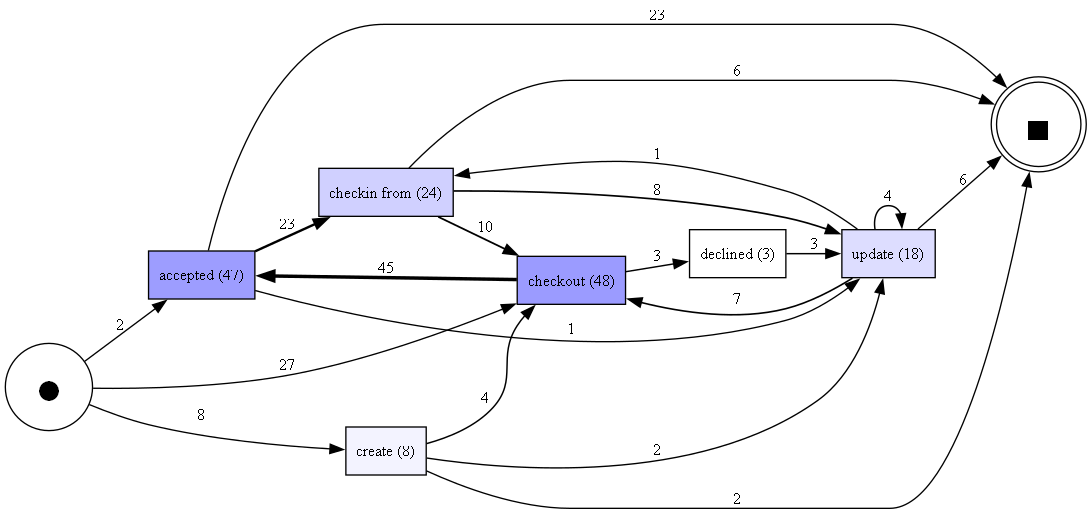

In [2]:
dfg, start_activities, end_activities = pm4py.discover_dfg(xes, 
                                                           case_id_key='case:concept:name',
                                                           activity_key='concept:name',
                                                           timestamp_key='time:timestamp'
                                                           )
pm4py.vis.view_dfg(dfg, start_activities, end_activities)

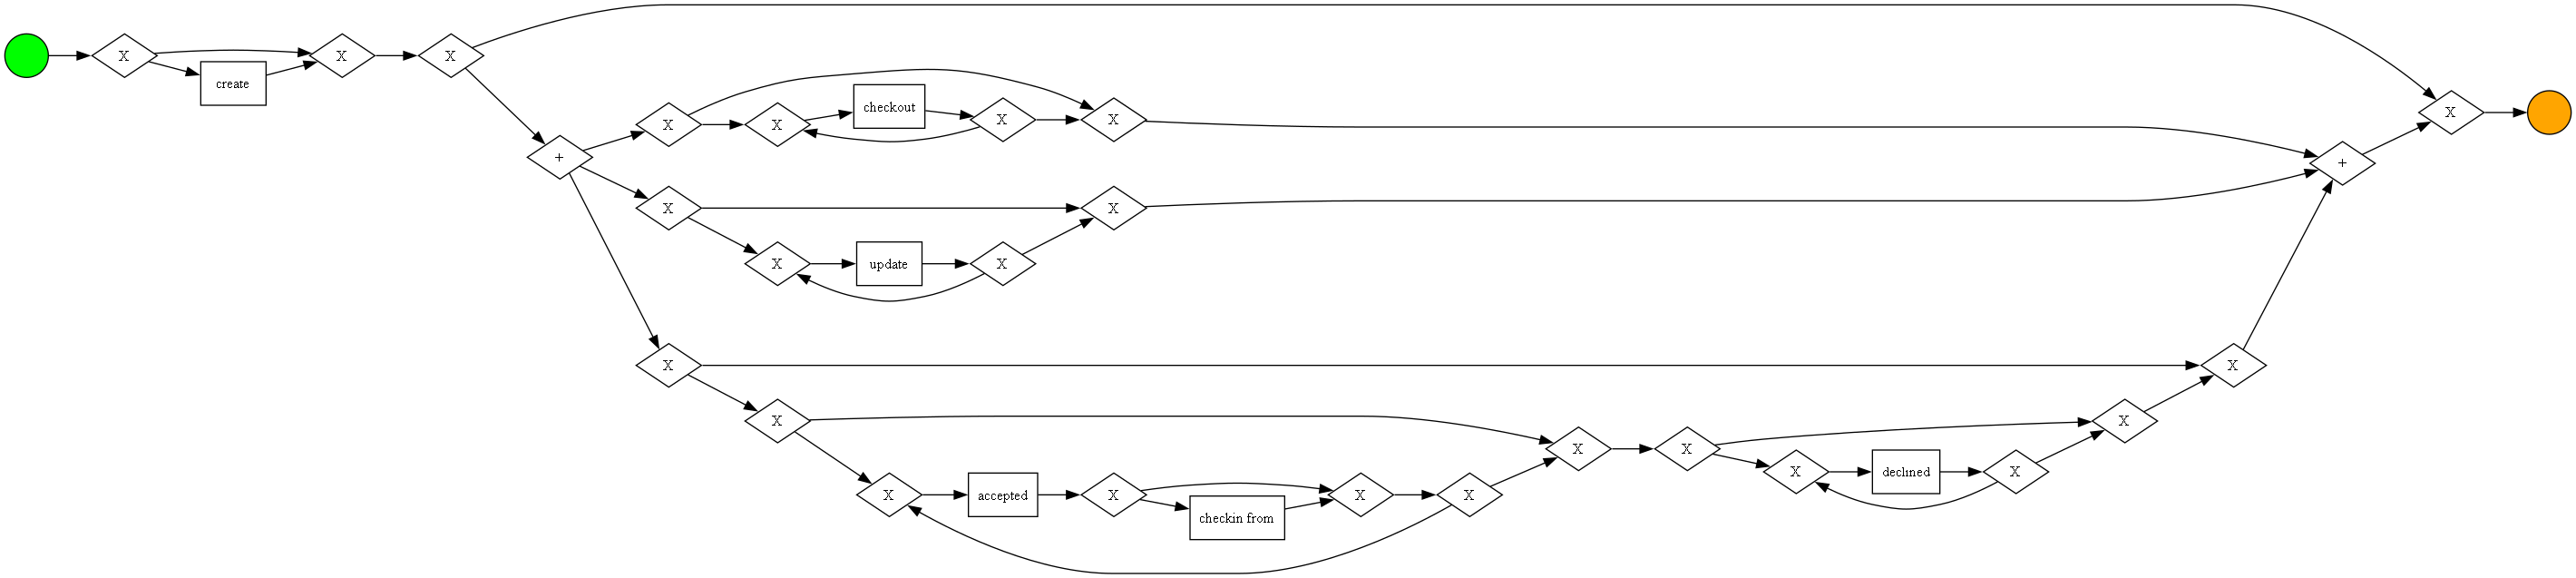

In [3]:
bpmn = pm4py.discover_bpmn_inductive(xes)
pm4py.vis.view_bpmn(bpmn)

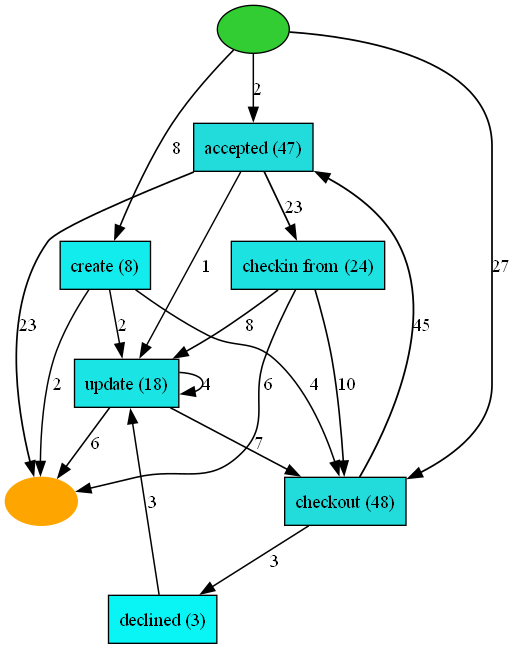

In [4]:
heuristics_net = pm4py.discover_heuristics_net(xes)
pm4py.vis.view_heuristics_net(heuristics_net)

In [5]:
count = 1
for variant, subdf in pm4py.split_by_process_variant(xes):
    print(f"Variante: {count}")
    print(variant)
    count += 1;

Variante: 1
('checkout', 'accepted', 'checkin from', 'update', 'checkout', 'accepted', 'checkin from', 'update', 'checkout', 'accepted', 'checkin from', 'checkout', 'accepted', 'checkin from', 'checkout', 'accepted')
Variante: 2
('checkout', 'accepted', 'checkin from', 'checkout', 'accepted')
Variante: 3
('checkout', 'accepted', 'checkin from', 'checkout', 'accepted', 'update', 'update', 'checkin from', 'update', 'checkout', 'accepted', 'checkin from')
Variante: 4
('checkout', 'accepted', 'checkin from', 'checkout', 'accepted', 'checkin from', 'update')
Variante: 5
('create', 'checkout', 'accepted', 'checkin from', 'update', 'checkout', 'accepted', 'checkin from', 'update')
Variante: 6
('create', 'update', 'update')
Variante: 7
('checkout', 'accepted', 'checkin from', 'checkout', 'accepted', 'checkin from', 'update', 'checkout', 'declined', 'update', 'update', 'checkout', 'declined', 'update')
Variante: 8
('create', 'checkout', 'accepted', 'checkin from', 'checkout', 'accepted', 'check

In [6]:
print(f"Anzahl der Variante: {count - 1}")

Anzahl der Variante: 17
